In [1]:
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"
if device == "cuda":
    print("GPU found :D Training will be carried out on GPU.")
else:
    print("No GPU found. Training will be carried out on CPU, which might be slower.")

No GPU found. Training will be carried out on CPU, which might be slower.


In the figure below, we have the timeline representation of the cognitive task:

![https://eeg2025.github.io/assets/img/CCD_sequence.png](https://eeg2025.github.io/assets/img/image-2.jpg)


In [ ]:
from pathlib import Path
from eegdash.dataset import EEGChallengeDataset

DATA_DIR = Path("HBN-EEG_data")
DATA_DIR.mkdir(parents=True, exist_ok=True)

dataset_ccd = EEGChallengeDataset(task="contrastChangeDetection",
                                  release="R5", cache_dir=DATA_DIR,
                                  mini=False) # `mini=False` means whole release

╭─────────────────────────────────────── EEG 2025 Competition Data Notice ────────────────────────────────────────╮
│ This object loads the HBN dataset that has been preprocessed for the EEG Challenge:                             │
│   * Downsampled from 500Hz to 100Hz                                                                             │
│   * Bandpass filtered (0.5-50 Hz)                                                                               │
│                                                                                                                 │
│ For full preprocessing applied for competition details, see:                                                    │
│   ]8;id=425968;https://github.com/eeg2025/downsample-datasets\https://github.com/eeg2025/downsample-datasets]8;;\                                                                │
│                                                                                                                 │
│ The HBN dataset have some preprocessing applied by the HBN team:                                                │
│   * Re-reference (Cz Channel)                                                                                   │
│                                                                                                                 │
│ IMPORTANT: The data accessed via `EEGChallengeDataset` is NOT identical to what you get from ]8;id=828090;https://github.com/sccn/EEGDash/blob/develop/eegdash/api.py\EEGDashDataset]8;;\     │
│ directly.                                                                                                       │
│ If you are participating in the competition, always use `EEGChallengeDataset` to ensure consistency with the    │
│ challenge data.                                                                                                 │
╰────────────────────────────────────────── Source: EEGChallengeDataset ──────────────────────────────────────────╯

In [5]:
dataset_ccd.__dir__()

['release',
 'mini',
 's3_bucket',
 'records',
 'download',
 'n_jobs',
 'eeg_dash_instance',
 'cache_dir',
 'query',
 'data_dir',
 'filesystem',
 'datasets',
 'cumulative_sizes',
 '_target_transform',
 '__module__',
 '__doc__',
 '__init__',
 '__parameters__',
 '_find_local_bids_records',
 '_find_key_in_nested_dict',
 '_find_datasets',
 '_get_sequence',
 '__getitem__',
 'split',
 'get_metadata',
 'transform',
 'target_transform',
 '_outdated_save',
 'description',
 'set_description',
 'save',
 '_save_signals',
 '_save_metadata',
 '_save_description',
 '_save_kwargs',
 '_save_target_name',
 '__annotations__',
 'cumsum',
 '__len__',
 'cummulative_sizes',
 '__orig_bases__',
 '__add__',
 '__dict__',
 '__weakref__',
 '__slots__',
 '_is_protocol',
 '__class_getitem__',
 '__init_subclass__',
 '__new__',
 '__repr__',
 '__hash__',
 '__str__',
 '__getattribute__',
 '__setattr__',
 '__delattr__',
 '__lt__',
 '__le__',
 '__eq__',
 '__ne__',
 '__gt__',
 '__ge__',
 '__reduce_ex__',
 '__reduce__',
 '_

In [42]:
print(f"INSTANCE = {dataset_ccd.eeg_dash_instance}")
print(f"RELEASE = {dataset_ccd.release}")
print("QUERY")
for k, v in dataset_ccd.query.items():
    print(f"  {k}: {v}")
#print(f"NUMBER OF SUBJS = {len(dataset_ccd.query['subject'])}") # query['subject'] key does not exist if mini=False
print(f"NUMBER OF DATASETS = {len(dataset_ccd.datasets)}")
#print(f"NUMBER OF RECORDINGS PER SUBJ = {int(len(dataset_ccd.datasets)/len(dataset_ccd.query['subject']))} runs") # query['subject'] key does not exist if mini=False
dataset_df = dataset_ccd.description
display(dataset_df.head(9))

# instead we list the subjects via the description dataframe:
subjects = dataset_df["subject"].unique()
print(f"TOTAL NUMBER OF SUBJS = {len(subjects)}")

less_runs = dict([(subj, len(dataset_df[dataset_df["subject"]==subj])) for subj in subjects
                                                                  if len(dataset_df[dataset_df["subject"]==subj]) != 3])
print(f"\nNUMBER OF SUBJS WITH LESS THAN 3 RUNS: {len(less_runs)}")
one_run = dict([(k, v) for k, v in less_runs.items() if v == 1])
two_runs = dict([(k, v) for k, v in less_runs.items() if v == 2])
print(f"    SUBJECTS WITH ONLY 1 RUN: {one_run}")
print(f"    SUBJECTS WITH ONLY 2 RUNS: {two_runs}")

# sanity check that the counting is correct
if len(one_run) + len(two_runs) * 2 + (len(subjects) - len(less_runs)) * 3 != len(dataset_df):
    raise ValueError("Something's wrong with the counting of runs per subject!")

display(dataset_df[dataset_df["subject"].isin(less_runs.keys())])

INSTANCE = <eegdash.api.EEGDash object at 0x15f284ed0>
RELEASE = R5
QUERY
  dataset: ds005509
  task: contrastChangeDetection
NUMBER OF DATASETS = 745


,subject,run,task,age,sex,release_number,ehq_total,commercial_use,full_pheno,p_factor,...,thepresent,diaryofawimpykid,contrastchangedetection_1,contrastchangedetection_2,contrastchangedetection_3,surroundsupp_1,surroundsupp_2,seqlearning6target,seqlearning8target,symbolsearch
0,NDARAC350XUM,3,contrastChangeDetection,8.2120,M,R5,46.69,Yes,No,1.004,...,available,available,available,available,available,available,available,available,unavailable,caution
1,NDARAC350XUM,1,contrastChangeDetection,8.2120,M,R5,46.69,Yes,No,1.004,...,available,available,available,available,available,available,available,available,unavailable,caution
2,NDARAC350XUM,2,contrastChangeDetection,8.2120,M,R5,46.69,Yes,No,1.004,...,available,available,available,available,available,available,available,available,unavailable,caution
3,NDARAC857HDB,1,contrastChangeDetection,6.9750,M,R5,53.36,Yes,No,0.803,...,available,available,available,available,available,available,available,available,unavailable,caution
4,NDARAC857HDB,2,contrastChangeDetection,6.9750,M,R5,53.36,Yes,No,0.803,...,available,available,available,available,available,available,available,available,unavailable,caution
5,NDARAC857HDB,3,contrastChangeDetection,6.9750,M,R5,53.36,Yes,No,0.803,...,available,available,available,available,available,available,available,available,unavailable,caution
6,NDARAH793FBF,1,contrastChangeDetection,9.3427,M,R5,60.03,Yes,No,0.317,...,available,available,available,available,available,available,available,unavailable,available,available
7,NDARAH793FBF,2,contrastChangeDetection,9.3427,M,R5,60.03,Yes,No,0.317,...,available,available,available,available,available,available,available,unavailable,available,available
8,NDARAH793FBF,3,contrastChangeDetection,9.3427,M,R5,60.03,Yes,No,0.317,...,available,available,available,available,available,available,available,unavailable,available,available


TOTAL NUMBER OF SUBJS = 260

NUMBER OF SUBJS WITH LESS THAN 3 RUNS: 32
    SUBJECTS WITH ONLY 1 RUN: {'NDARJX505XD6': 1, 'NDARMU589LP6': 1, 'NDARXN140AZE': 1}
    SUBJECTS WITH ONLY 2 RUNS: {'NDARAV187GJ5': 2, 'NDARCG159AAP': 2, 'NDARDR804MFE': 2, 'NDARFG953RRK': 2, 'NDARGD425PTN': 2, 'NDARGM196JMM': 2, 'NDARHT019ER6': 2, 'NDARHX963YU1': 2, 'NDARJM296MDW': 2, 'NDARKZ634RVX': 2, 'NDARLD978JVJ': 2, 'NDARLY114PDC': 2, 'NDARMF668NU5': 2, 'NDARMG451PJA': 2, 'NDARMY873XG5': 2, 'NDARNY419GR2': 2, 'NDARPD855ARC': 2, 'NDARPE752VYE': 2, 'NDARPF459CME': 2, 'NDARPK237YHD': 2, 'NDARRB901DWV': 2, 'NDARRX800KW8': 2, 'NDARTD925CTP': 2, 'NDARTG396FGE': 2, 'NDARUV578DU2': 2, 'NDARUX086TVT': 2, 'NDARVB902GA5': 2, 'NDARVG761NR2': 2, 'NDARZM903TNL': 2}


,subject,run,task,age,sex,release_number,ehq_total,commercial_use,full_pheno,p_factor,...,thepresent,diaryofawimpykid,contrastchangedetection_1,contrastchangedetection_2,contrastchangedetection_3,surroundsupp_1,surroundsupp_2,seqlearning6target,seqlearning8target,symbolsearch
30,NDARAV187GJ5,2,contrastChangeDetection,10.4548,M,R5,-60.03,Yes,No,0.721,...,available,available,unavailable,available,available,available,available,unavailable,available,available
31,NDARAV187GJ5,3,contrastChangeDetection,10.4548,M,R5,-60.03,Yes,No,0.721,...,available,available,unavailable,available,available,available,available,unavailable,available,available
65,NDARCG159AAP,2,contrastChangeDetection,10.0218,F,R5,100.05,Yes,No,-0.409,...,available,available,unavailable,available,available,available,available,unavailable,available,available
66,NDARCG159AAP,3,contrastChangeDetection,10.0218,F,R5,100.05,Yes,No,-0.409,...,available,available,unavailable,available,available,available,available,unavailable,available,available
100,NDARDR804MFE,3,contrastChangeDetection,11.6452,F,R5,93.38,Yes,No,-1.450,...,available,available,unavailable,available,available,available,available,unavailable,available,available
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,NDARVG761NR2,3,contrastChangeDetection,11.0818,M,R5,46.69,Yes,No,-0.675,...,available,available,unavailable,available,available,available,available,unavailable,available,caution
606,NDARVG761NR2,2,contrastChangeDetection,11.0818,M,R5,46.69,Yes,No,-0.675,...,available,available,unavailable,available,available,available,available,unavailable,available,caution
679,NDARXN140AZE,1,contrastChangeDetection,5.2692,M,R5,73.37,Yes,No,-0.182,...,available,available,available,unavailable,unavailable,available,unavailable,available,unavailable,available
737,NDARZM903TNL,2,contrastChangeDetection,9.5864,F,R5,100.05,Yes,No,-0.156,...,available,available,unavailable,available,available,available,available,unavailable,available,available


In [308]:
%%capture
# since the dataset is large, we will only download a small subset for testing
# using %%capture to suppress the download output
dataset_ccd = EEGChallengeDataset(task="contrastChangeDetection",
                                  release="R5", cache_dir=DATA_DIR,
                                  mini=True) # `mini=True` to download only a small subset for testing
dataset_df = dataset_ccd.description
subjects = dataset_ccd.query["subject"]

raw = dataset_ccd.datasets[0].raw  # download the `Raw` object of the first recording

In [61]:
import os
def list_files(startpath):
    for root, dirs, files in os.walk(startpath):
        level = root.replace(startpath, "").count(os.sep)
        indent = " " * 4 * (level)
        print("{}{}/".format(indent, os.path.basename(root))) # get the last component of the path
        subindent = " " * 4 * (level + 1)
        for f in files:
            if "DS_Store" not in f:  # skip macOS .DS_Store files
                print("{}{}".format(subindent, f))
list_files("HBN-EEG_data")

HBN-EEG_data/
    ds005509-bdf-mini/
        task-DespicableMe_events.json
        task-ThePresent_eeg.json
        task-seqLearning6target_eeg.json
        task-seqLearning8target_events.json
        task-ThePresent_events.json
        task-FunwithFractals_eeg.json
        task-seqLearning8target_eeg.json
        task-surroundSupp_events.json
        task-DiaryOfAWimpyKid_events.json
        task-contrastChangeDetection_events.json
        task-symbolSearch_eeg.json
        task-RestingState_eeg.json
        task-FunwithFractals_events.json
        task-RestingState_events.json
        task-DiaryOfAWimpyKid_eeg.json
        dataset_description.json
        task-contrastChangeDetection_eeg.json
        task-DespicableMe_eeg.json
        task-symbolSearch_events.json
        participants.tsv
        task-surroundSupp_eeg.json
        task-seqLearning6target_events.json
        sub-NDARAH793FBF/
            eeg/
                sub-NDARAH793FBF_task-contrastChangeDetection_run-3_events.t

In [62]:
print(f"type(raw) = {type(raw)}")
display(raw.info)
print(f"Raw data shape = {raw.get_data().shape}")

type(raw) = <class 'mne.io.edf.edf.RawEDF'>


<Info | 9 non-empty values
 bads: []
 ch_names: E1, E2, E3, E4, E5, E6, E7, E8, E9, E10, E11, E12, E13, E14, ...
 chs: 129 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 line_freq: 60.0
 lowpass: 50.0 Hz
 meas_date: 2025-08-19 00:06:17 UTC
 nchan: 129
 projs: []
 sfreq: 100.0 Hz
 subject_info: <subject_info | his_id: sub-NDARAH793FBF, sex: 1, birthday: 2016-04-15>
>

Raw data shape = (129, 34900)


In [63]:
import mne
import os

# Create the directory
dir_name = "EEGLAB"
try:
    os.makedirs(f"HBN-EEG_data/{dir_name}")
    print(f"Directory 'HBN-EEG_data/{dir_name}' created successfully.")
except FileExistsError:
    pass

for subj in subjects:
    try:
        os.makedirs(f"HBN-EEG_data/{dir_name}/sub-{subj}")
    except FileExistsError:
        pass
print(f"Directories for all subjects created successfully inside 'HBN-EEG_data/{dir_name}'.")

subj_id = dataset_df.iloc[0]["subject"]
run_id = dataset_df.iloc[0]["run"]
print(f"Subject ID: {subj_id}, Run ID: {run_id}")

mne.export.export_raw(f"HBN-EEG_data/EEGLAB/sub-{subj_id}/original_{subj_id}-run{run_id}.set", raw, overwrite=True)

Directory 'HBN-EEG_data/EEGLAB' created successfully.
Directories for all subjects created successfully inside 'HBN-EEG_data/EEGLAB'.
Subject ID: NDARAH793FBF, Run ID: 1
Reading 0 ... 34899  =      0.000 ...   348.990 secs...


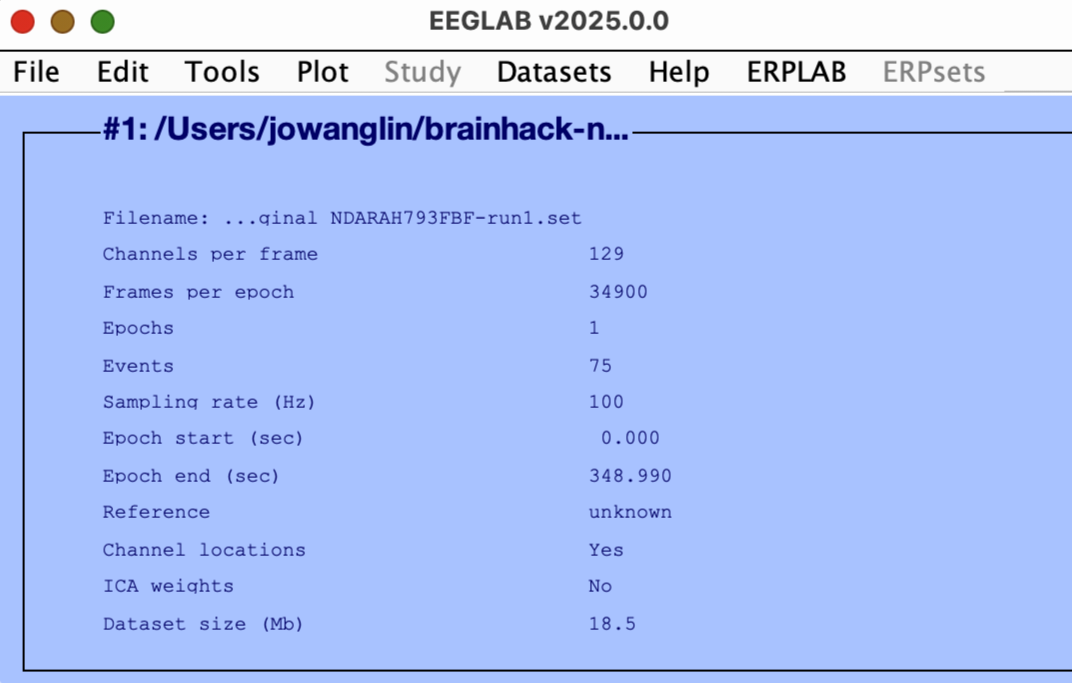

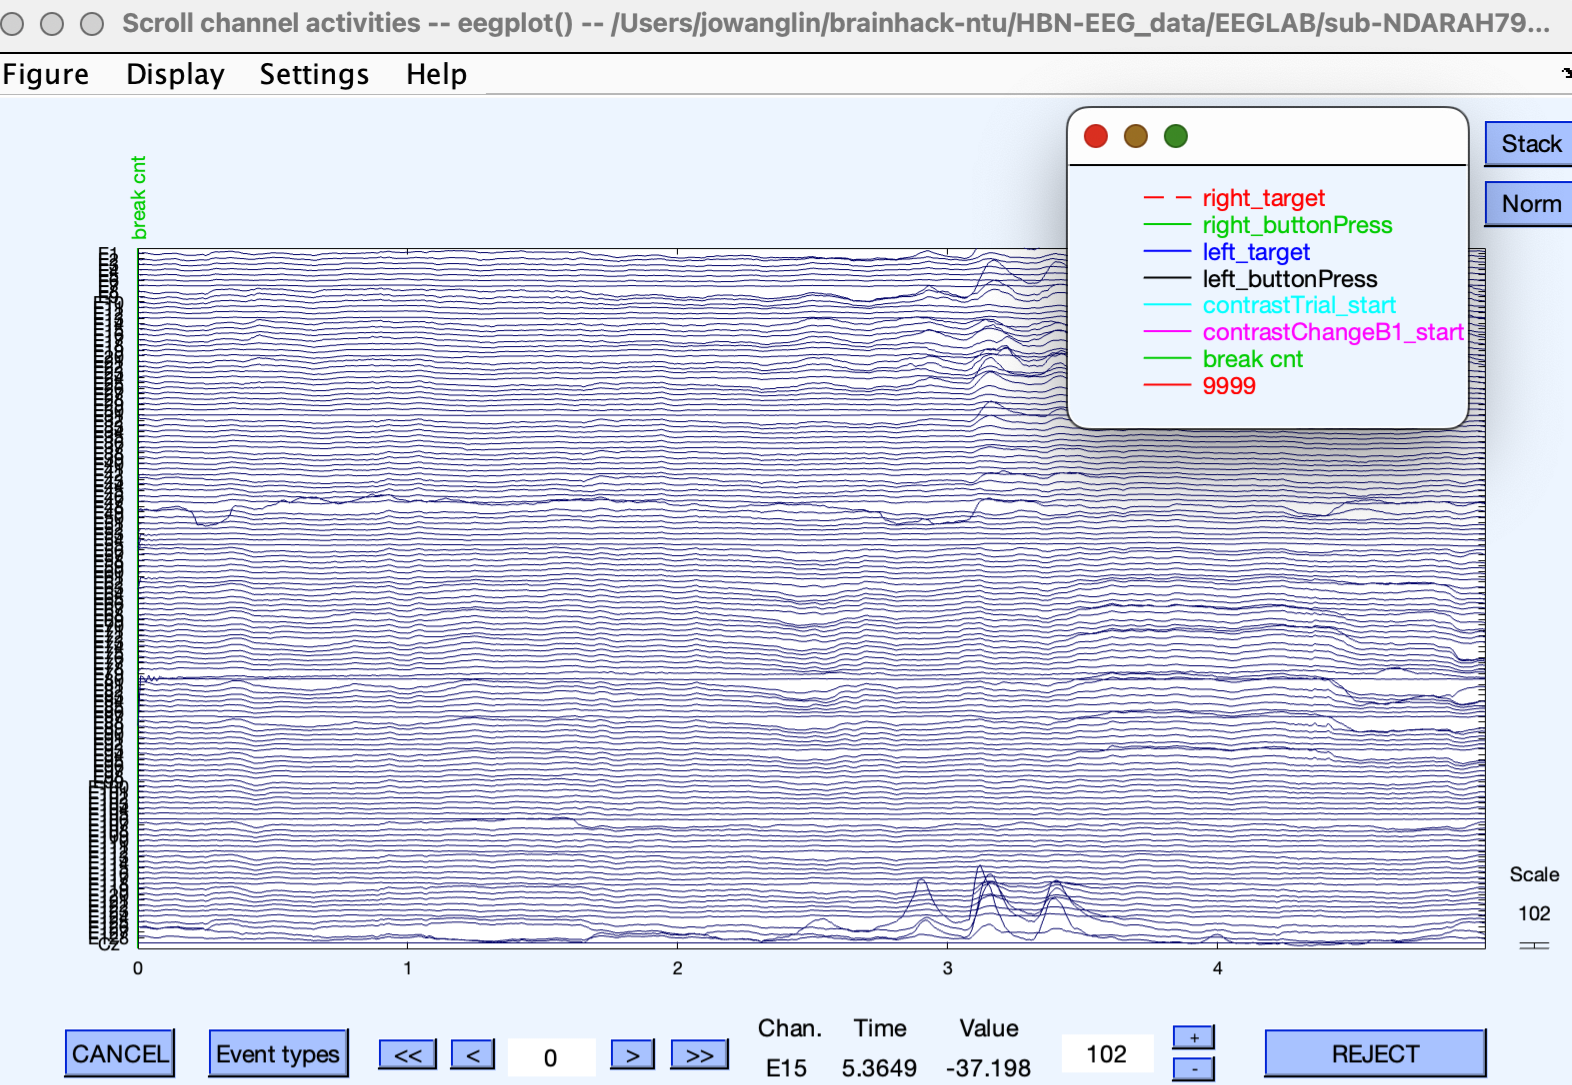

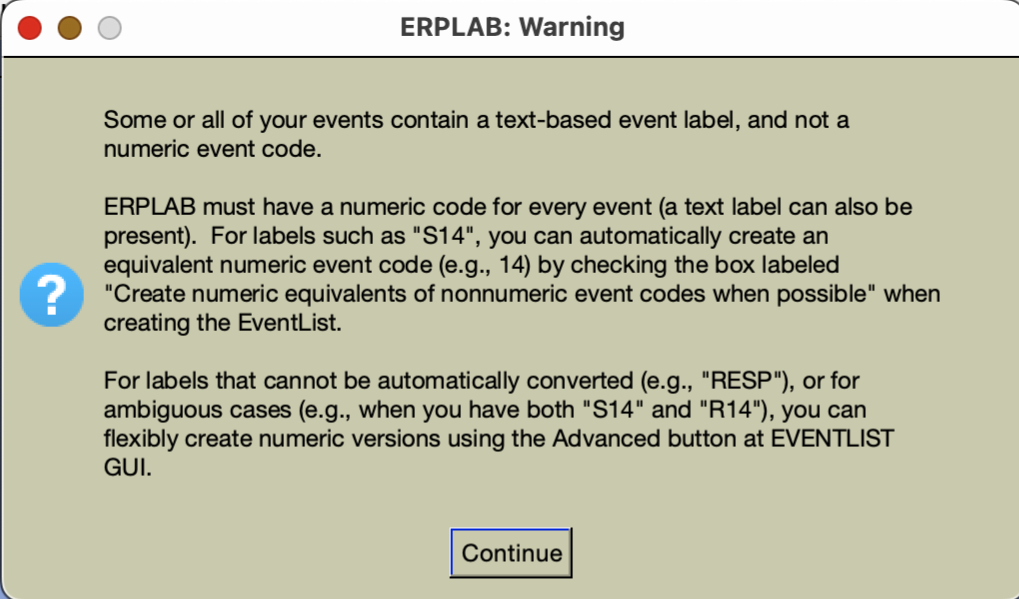

In [100]:
# display cell; don't run
from IPython.display import Image, display

display(Image(filename="screenshots/info.png", width=500))
display(Image(filename="screenshots/original_data-scroll.png", width=500))
display(Image(filename="screenshots/text-labels.png", width=500))

As we've seen in the directory tree, the `eegdash` dataset object downloads data only when necessary: in this case, only the first recording and its related metadata were downloaded. Here, we use `joblib.Parallel` and `joblib.delayed` to download all data in parallel instead of doing:
```
raws = []
for d in dataset_ccd.datasets:
    raws.append(d.raw)
```
which runs _sequentially_.

Note also that `joblib.delayed` prevents each functuion `(lambda d: d.raw)(d)` from being executed immediately; it wraps each function and its arguments into a _"job" object_ for `joblib.Parallel` to assign them to workers for parallel download.

In [ ]:
# download all Raw objects in parallel
from joblib import Parallel, delayed

# n_jobs=-1 uses as many workers as available CPU cores (not tensor operations; GPU irrelevant here)
raws = Parallel(n_jobs=-1)(
    delayed(lambda d: d.raw)(d) for d in dataset_ccd.datasets
)

## 2. Creating the windows of interest

Now that we have our raw dataset, defining the windows/epoch interval is essential.

For this challenge, we test many different and semantically different regions of interest, and our preliminary studies show us that the most interesting area of interest is defined below:


*        stimulus         │        response         │        feedback
*                         │ *********************** (stimulus + 0.5)

So we epoch after the stimulus moment with a beginning shift of 500 ms.

In [ ]:
from braindecode.datasets import BaseConcatDataset
import copy
import numpy as np
import pandas as pd


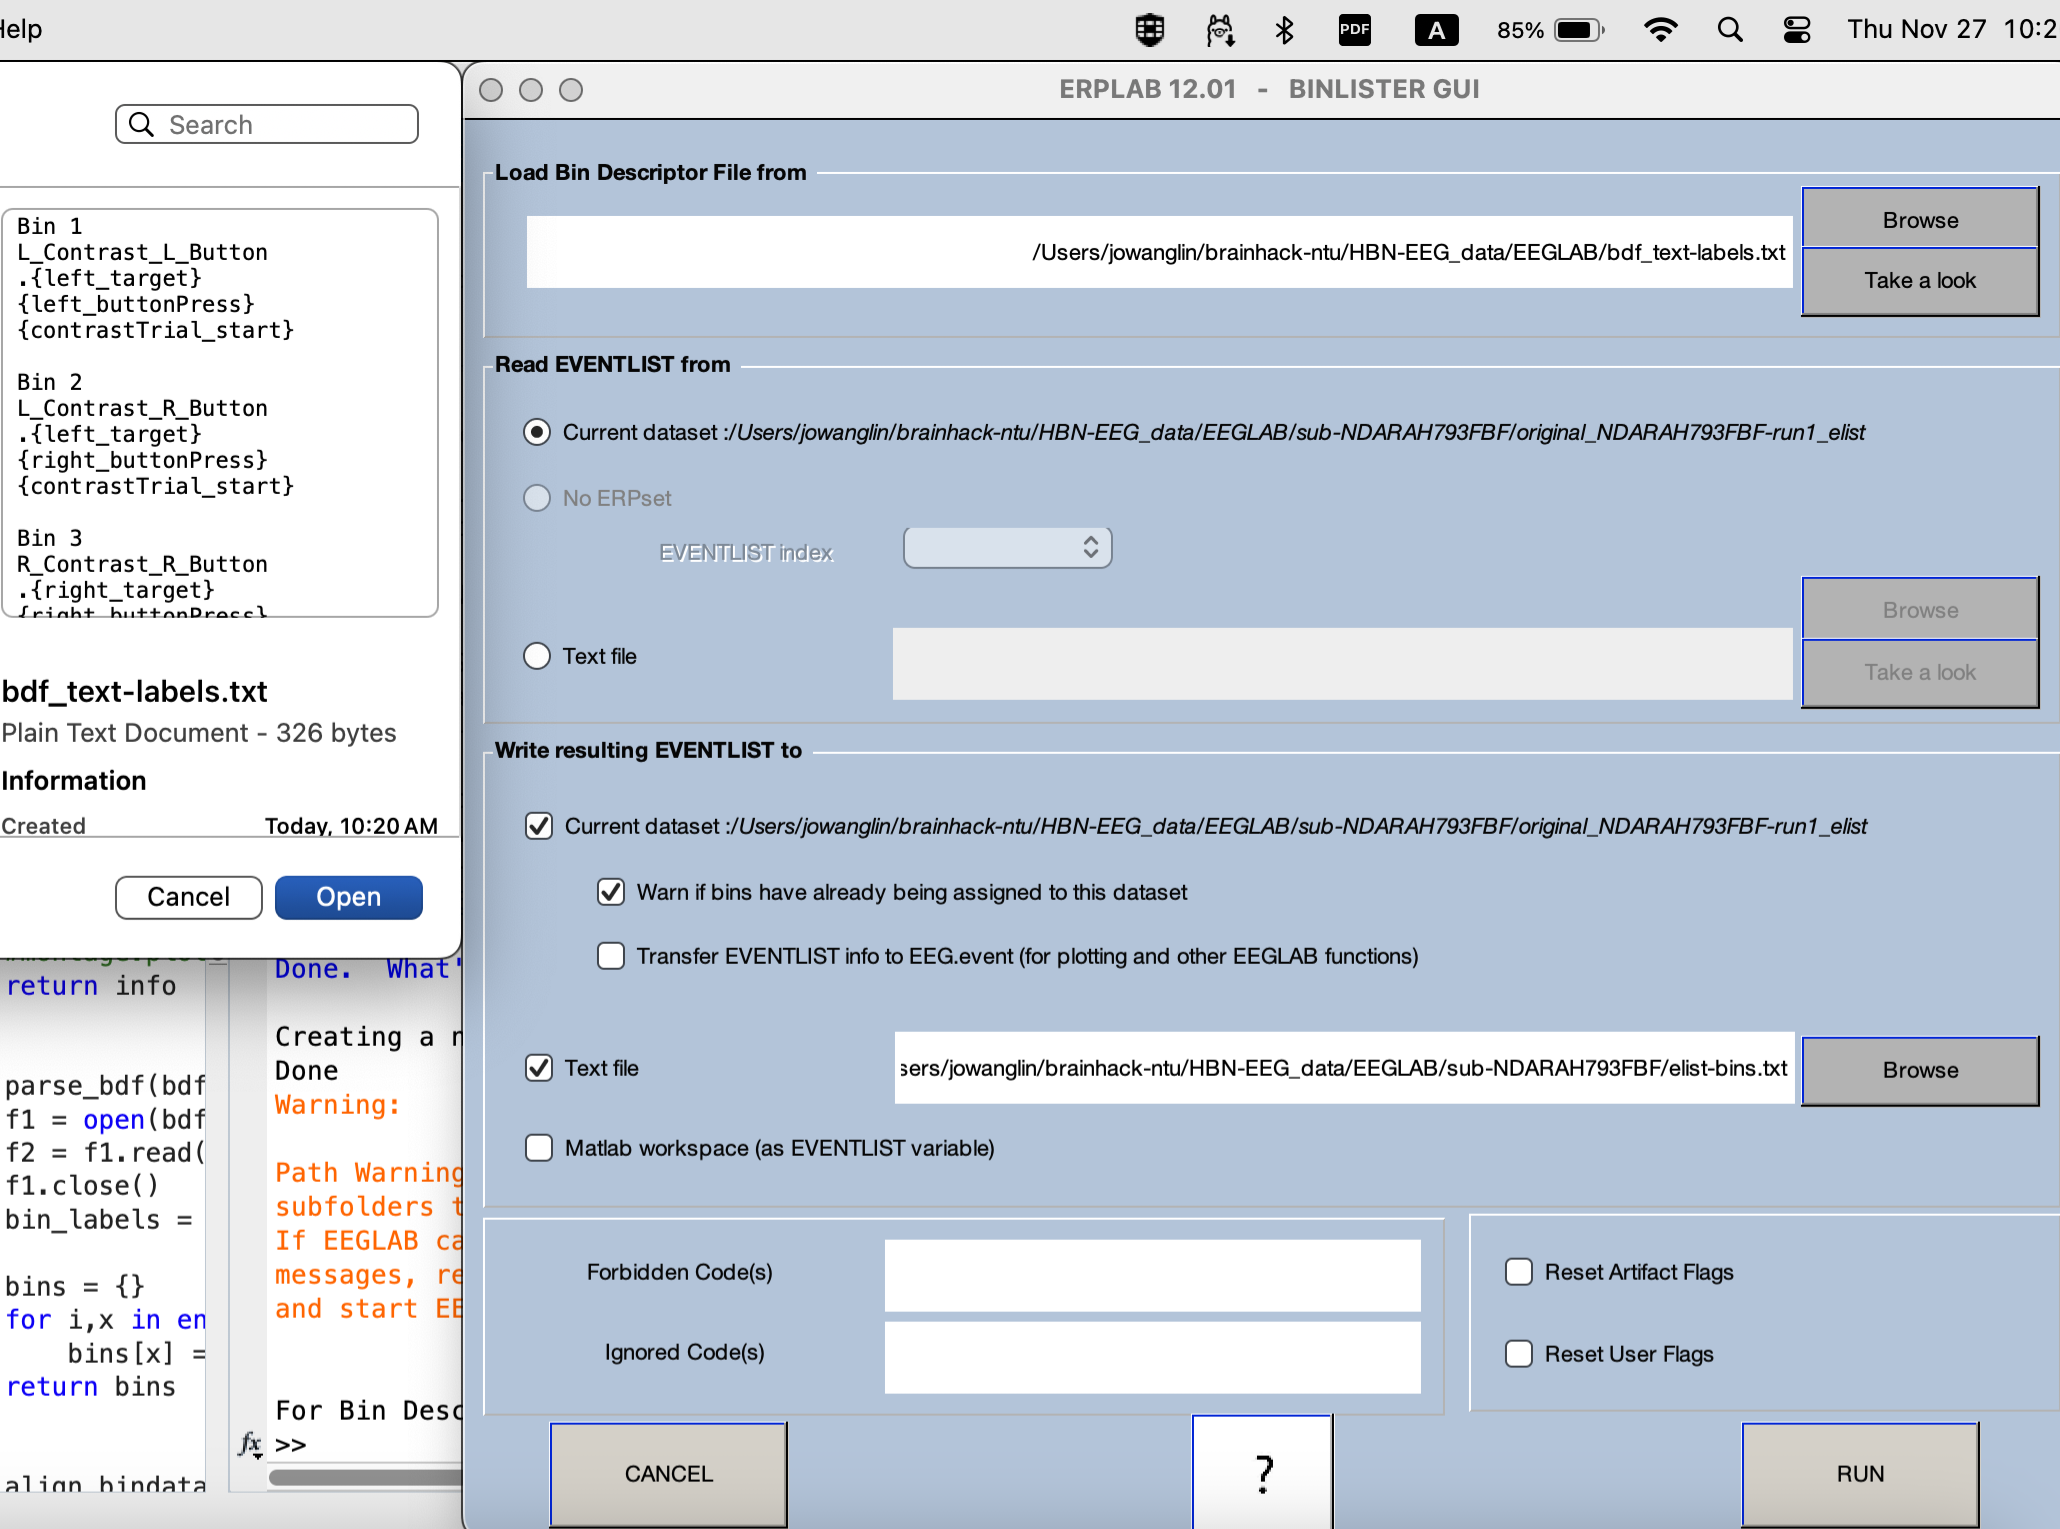

In [ ]:
# display cell; don't run
display(Image(filename="screenshots/binlister.png", width=500))

In [90]:
annot = copy.deepcopy(raw.annotations)
print(f"ANNOTATIONS LENGTH = {len(annot)}\n")

description_to_event_code = {}
for _, a in enumerate(annot):
    if _ <= 10:
        print(annot[_]) 
    description_to_event_code[str(a["description"])] = a["extras"]["event_code"]

description_to_event_code["break cnt"] = "0"
print("\n")
print(description_to_event_code)

ANNOTATIONS LENGTH = 75

OrderedDict([('onset', np.float64(0.0)), ('duration', np.float64(0.0)), ('description', np.str_('break cnt')), ('orig_time', datetime.datetime(2025, 8, 19, 0, 6, 17, tzinfo=datetime.timezone.utc)), ('extras', {np.str_('feedback'): 'n/a', np.str_('event_code'): 'break cnt'})])
OrderedDict([('onset', np.float64(96.766)), ('duration', np.float64(0.0)), ('description', np.str_('contrastChangeB1_start')), ('orig_time', datetime.datetime(2025, 8, 19, 0, 6, 17, tzinfo=datetime.timezone.utc)), ('extras', {np.str_('feedback'): 'n/a', np.str_('event_code'): '94'})])
OrderedDict([('onset', np.float64(107.24)), ('duration', np.float64(0.0)), ('description', np.str_('contrastTrial_start')), ('orig_time', datetime.datetime(2025, 8, 19, 0, 6, 17, tzinfo=datetime.timezone.utc)), ('extras', {np.str_('feedback'): 'n/a', np.str_('event_code'): '5'})])
OrderedDict([('onset', np.float64(110.062)), ('duration', np.float64(0.0)), ('description', np.str_('right_target')), ('orig_time'

In [ ]:
event_code_to_description = {v: k for k, v in description_to_event_code.items()}
event_code_to_description["break cnt"] = "break cnt"
orig_time = annot[0]["orig_time"]

def get_numeric_event_codes(raw, add_post_stim_code=False, shift=None):  # shift unit in seconds
    annot = raw.annotations
    items = {}
    for __annotations__, key in enumerate(annot[0].keys()): items[key] = []
    for i in range(len(annot)):
        for _, key in enumerate(annot[i].keys()):
            if key == "description":
                items[key].append(description_to_event_code[annot[i][key]])
            elif key == "extras":
                annot[i][key]["verbose"] = event_code_to_description[annot[i][key]["event_code"]]
                annot[i][key].pop("event_code", None)
                items[key].append(annot[i][key])
            else:
                items[key].append(annot[i][key])
    
    # re-annotate with post-stimulus target shift event codes for bin-baswd epoching in EEGLAB
    # there should be a more efficient way to do this though... ><
    if add_post_stim_code:
        feedback = [items["extras"][_]["feedback"] for _ in range(len(items["extras"]))]
        verbose = [items["extras"][_]["verbose"] for _ in range(len(items["extras"]))]
        items_df = pd.DataFrame(items)
        items_df.drop(columns=["extras"], inplace=True)
        items_df["feedback"] = feedback
        items_df["verbose"] = verbose
        # display(items_df)   

        verbose_dict = {"8": "left_target_shift"+str(shift*1000), "9": "right_target_shift"+str(shift*1000),}
        to_add_dicts = [{"onset": float(row["onset"]) + shift, 
                         "duration": 0.0, 
                         "description": str(int(row["description"]) * 10), 
                         "orig_time": items_df.loc[0, "orig_time"],
                         "feedback": "n/a",
                         "verbose": verbose_dict[row["description"]]}
                             for _, row in items_df.iterrows() if row["description"] in ["8", "9"]]
        # print(to_add_dicts)
        print(f"Adding {len(to_add_dicts)} event codes for {shift*1000} ms post-stimulus target shifts...")

        items_df = items_df.transpose()
        items_df_copy = copy.deepcopy(items_df)
        j = 0
        for  i, col in enumerate(items_df.loc["description"]):
            if col in ["8", "9"]:
                # print(f"Inserting at index {i + 1 + j}: {to_add_dicts[j]}")
                items_df_copy.insert(i+1+j, "_"+str(j), to_add_dicts[j]) 
                j += 1

        items_df_copy = items_df_copy.transpose().reset_index(drop=True)
        # display(items_df_copy)

        new_items = {}
        for key in ["onset", "duration", "description"]:
            new_items[key] = list(items_df_copy[key])
        new_items["orig_time"] = orig_time
        new_items["extras"] = [{"feedback": items_df_copy.loc[_, "feedback"],
                                "verbose": items_df_copy.loc[_, "verbose"]} for _ in range(len(items_df_copy))]
    else:
        new_items = items

    new_annot = mne.Annotations(np.array(new_items["onset"], dtype=object),
                            np.array(new_items["duration"], dtype=object),
                            np.array(new_items["description"], dtype=object),
                            orig_time=orig_time, ch_names=None,
                            extras = new_items["extras"])
    new_raw = raw.copy().set_annotations(new_annot)   
    return new_raw

new_raw = get_numeric_event_codes(raw)
print(f"Original annotations at index [10]:\n  {raw.annotations[10]}")
print(f"New annotations at index [10]:\n  {new_raw.annotations[10]}\n")

new_raw_toeeglab = get_numeric_event_codes(raw, add_post_stim_code=True, shift=0.5)
display(new_raw_toeeglab.annotations.to_data_frame(time_format=None).head(15))


Original annotations at index [10]:
  OrderedDict([('onset', np.float64(124.04)), ('duration', np.float64(0.0)), ('description', np.str_('right_buttonPress')), ('orig_time', datetime.datetime(2025, 8, 19, 0, 6, 17, tzinfo=datetime.timezone.utc)), ('extras', {np.str_('feedback'): 'smiley_face', np.str_('event_code'): '13'})])
New annotations at index [10]:
  OrderedDict([('onset', np.float64(124.04)), ('duration', np.float64(0.0)), ('description', np.str_('13')), ('orig_time', datetime.datetime(2025, 8, 19, 0, 6, 17, tzinfo=datetime.timezone.utc)), ('extras', {np.str_('feedback'): 'smiley_face', 'verbose': 'right_buttonPress'})])

Adding 24 event codes for 500.0 ms post-stimulus target shifts...


,onset,duration,description,feedback,verbose
0,0.000,0.0,0,n/a,break cnt
1,96.766,0.0,94,n/a,contrastChangeB1_start
2,107.240,0.0,5,n/a,contrastTrial_start
3,110.062,0.0,9,n/a,right_target
4,110.562,0.0,90,n/a,right_target_shift500.0
5,112.172,0.0,13,smiley_face,right_buttonPress
6,112.488,0.0,5,n/a,contrastTrial_start
7,115.290,0.0,9,n/a,right_target
8,115.790,0.0,90,n/a,right_target_shift500.0
9,117.160,0.0,13,smiley_face,right_buttonPress


In [165]:
mne.export.export_raw(f"HBN-EEG_data/EEGLAB/sub-{subj_id}/{subj_id}-run{run_id}.set", new_raw_toeeglab, overwrite=True)

Overwriting existing file.


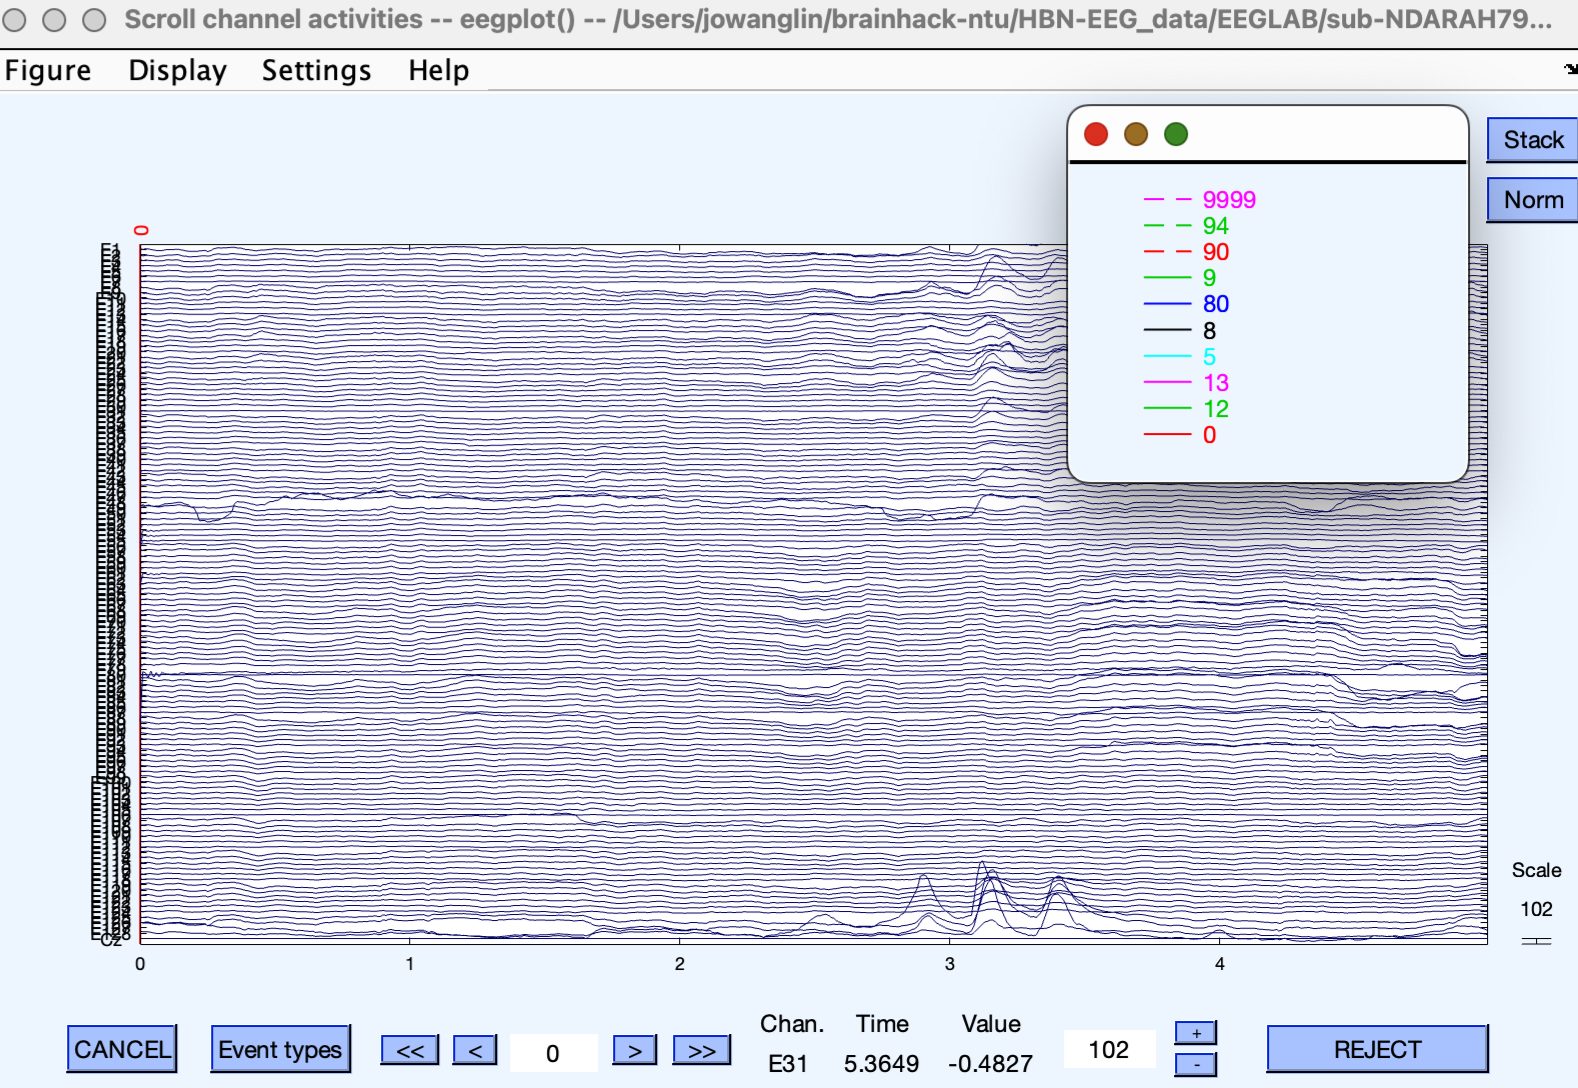

In [166]:
# display cell; don't run
display(Image(filename="screenshots/data-scroll.png", width=500))

In [309]:
%%capture
from braindecode.preprocessing import preprocess, Preprocessor, create_windows_from_events
from eegdash.hbn.windows import (
    build_trial_table,
    annotate_trials_with_target,
    add_aux_anchors,
    add_extras_columns,
    keep_only_recordings_with,
)

# creating a CCD dataset copy (because `braindecode.preprocessing.preprocess` applies to the BaseConcatDataset instance in-place)
dataset_ccd_copy = EEGChallengeDataset(task="contrastChangeDetection",
                                       release="R5", cache_dir=DATA_DIR,
                                       mini=True)

### First we look at what the following functions do for a single instance of `Raw`
- `build_trial_table`
- `annotate_trials_with_target`
- `add_aux_anchors`

In [ ]:
# reads and displays events dataframe (BIDS events.tsv file) for a single subject
events_df = pd.read_csv(f"HBN-EEG_data/ds005509-bdf-mini/sub-{subj_id}/eeg/sub-{subj_id}_task-contrastChangeDetection_run-1_events.tsv", sep="\t")
print("events_df")
display(events_df.head(28))

# builds a table of contrast trials from an events dataframe
trial_table = build_trial_table(events_df)
print("trial_table")
display(trial_table.head(9))

# note row indices 23, 24 of events_df show a missed response, which corresponds to row index 7 of trial_table

events_df


,onset,duration,value,event_code,feedback
0,0.000,NaN,break cnt,break cnt,NaN
1,96.766,NaN,contrastChangeB1_start,94,NaN
2,107.240,NaN,contrastTrial_start,5,NaN
3,110.062,NaN,right_target,9,NaN
4,112.172,NaN,right_buttonPress,13,smiley_face
5,112.488,NaN,contrastTrial_start,5,NaN
6,115.290,NaN,right_target,9,NaN
7,117.160,NaN,right_buttonPress,13,smiley_face
8,117.690,NaN,contrastTrial_start,5,NaN
9,122.090,NaN,right_target,9,NaN


trial_table


,trial_start_onset,trial_stop_onset,stimulus_onset,response_onset,rt_from_stimulus,rt_from_trialstart,response_type,correct
0,107.240,112.488,110.062,112.172,2.110,4.932,right_buttonPress,True
1,112.488,117.690,115.290,117.160,1.870,4.672,right_buttonPress,True
2,117.690,124.490,122.090,124.040,1.950,6.350,right_buttonPress,True
3,124.490,132.890,130.490,132.590,2.100,8.100,right_buttonPress,True
4,132.890,138.090,135.690,136.910,1.220,4.020,left_buttonPress,True
5,138.090,143.290,140.890,142.720,1.830,4.630,right_buttonPress,True
6,143.290,150.090,147.690,149.552,1.862,6.262,right_buttonPress,True
7,150.090,156.892,154.490,NaN,NaN,NaN,None,None
8,156.892,163.690,161.290,162.920,1.630,6.028,left_buttonPress,True


In [239]:
EPOCH_LEN_S = 2.0
SFREQ = new_raw.info["sfreq"] # 100.00 Hz

# reads the BIDS events file associated with the raw object, builds a trial table, and creates new MNE annotations for each trial.
# annotations are labeled as “contrast_trial_start” 
# their extras dictionary is populated with trial metrics, including a “target” key.
new_raw = annotate_trials_with_target(new_raw, target_field="rt_from_stimulus", epoch_length=EPOCH_LEN_S,
                                      require_stimulus=True, require_response=True)
print(f"Created new annotations with `eegdash.hbn.annotate_trials_with_target` for {subj_id}-run{run_id}'s raw object:")
display(new_raw.annotations.to_data_frame(time_format=None).head(6))

# adds auxiliary annotations for stimulus and response onsets, labeled as "stimulus_anchor" and "response_anchor"
new_raw = add_aux_anchors(new_raw, stim_desc="stimulus_anchor", resp_desc="response_anchor")
print(f"Added auxiliary annotations (stimulus & response onsets) with `eegdash.hbn.add_aux_anchors` for {subj_id}-run{run_id}'s raw object:")
display(new_raw.annotations.to_data_frame(time_format=None).head(6))

Created new annotations with `eegdash.hbn.annotate_trials_with_target` for NDARAH793FBF-run1's raw object:


,onset,duration,description,correct,response_onset,response_type,rt_from_stimulus,rt_from_trialstart,stimulus_onset,target
0,45.872,2.0,contrast_trial_start,0,53.672,left_buttonPress,1.80,7.80,51.872,1.80
1,61.072,2.0,contrast_trial_start,0,68.622,right_buttonPress,1.55,7.55,67.072,1.55
2,69.472,2.0,contrast_trial_start,0,75.562,left_buttonPress,1.69,6.09,73.872,1.69
3,76.272,2.0,contrast_trial_start,0,83.992,right_buttonPress,1.72,7.72,82.272,1.72
4,93.072,2.0,contrast_trial_start,0,99.272,left_buttonPress,1.80,6.20,97.472,1.80
5,105.072,2.0,contrast_trial_start,0,109.582,right_buttonPress,1.71,4.51,107.872,1.71


Added auxiliary annotations (stimulus & response onsets) with `eegdash.hbn.add_aux_anchors` for NDARAH793FBF-run1's raw object:


,onset,duration,description,anchor,correct,response_onset,response_type,rt_from_stimulus,rt_from_trialstart,stimulus_onset,target
0,45.872,2.0,contrast_trial_start,NaN,0,53.672,left_buttonPress,1.80,7.80,51.872,1.80
1,51.872,0.0,stimulus_anchor,stimulus,0,53.672,left_buttonPress,1.80,7.80,51.872,1.80
2,53.672,0.0,response_anchor,response,0,53.672,left_buttonPress,1.80,7.80,51.872,1.80
3,61.072,2.0,contrast_trial_start,NaN,0,68.622,right_buttonPress,1.55,7.55,67.072,1.55
4,67.072,0.0,stimulus_anchor,stimulus,0,68.622,right_buttonPress,1.55,7.55,67.072,1.55
5,68.622,0.0,response_anchor,response,0,68.622,right_buttonPress,1.55,7.55,67.072,1.55


### Windowing via `braindecode.preprocessing.create_windows_from_events`

In [310]:
%%capture
EPOCH_LEN_S = 2.0
SFREQ = 100 

# here, `preprocess` actually just re-annotates each recording's `Raw` object in the dataset, not EEG preprocessing per se
# (you can of course add EEG preprocessing steps or other custom functions to the list of `Preprocessor`s as needed)
# if `apply_on_array=False`, the callable function must directly modify the `Raw` or `Epochs` object
preprocessors = [
    Preprocessor(
        annotate_trials_with_target,
        target_field="rt_from_stimulus", epoch_length=EPOCH_LEN_S,
        require_stimulus=True, require_response=True,
        apply_on_array=False,
    ),
    Preprocessor(add_aux_anchors, apply_on_array=False)   
]
preprocess(dataset_ccd, preprocessors, n_jobs=-1)

STIM_LOCK = "stimulus_anchor"
# Keep only recordings that actually contain stimulus anchors
dataset = keep_only_recordings_with(STIM_LOCK, dataset_ccd)

In [311]:
reannotated_raw = dataset.datasets[0].raw  # get the re-annotated `Raw` object of the first recording
display(reannotated_raw.annotations.to_data_frame(time_format=None).head(6))

,onset,duration,description,anchor,correct,response_onset,response_type,rt_from_stimulus,rt_from_trialstart,stimulus_onset,target
0,107.240,2.0,contrast_trial_start,NaN,1,112.172,right_buttonPress,2.11,4.932,110.062,2.11
1,110.062,0.0,stimulus_anchor,stimulus,1,112.172,right_buttonPress,2.11,4.932,110.062,2.11
2,112.172,0.0,response_anchor,response,1,112.172,right_buttonPress,2.11,4.932,110.062,2.11
3,112.488,2.0,contrast_trial_start,NaN,1,117.160,right_buttonPress,1.87,4.672,115.290,1.87
4,115.290,0.0,stimulus_anchor,stimulus,1,117.160,right_buttonPress,1.87,4.672,115.290,1.87
5,117.160,0.0,response_anchor,response,1,117.160,right_buttonPress,1.87,4.672,115.290,1.87


In [312]:
%%capture
SHIFT_AFTER_STIM = 0.5
TRIAL_DURATION = 2.0

# if `mne_epochs=False`, returns `EEGWindowsDataset` objects
# if `mne_epochs=True`, returns `mne.Epochs` objects encapsulated in `WindowsDataset` objects, which is much slower that `EEGWindowsDataset`
windows_dataset = create_windows_from_events(
    dataset,
    mapping={STIM_LOCK: -100}, # `stimulus_anchor` (not `contrast_trial_start`) is the "trial start" event for `create_windows_from_events`
    trial_start_offset_samples=int(SHIFT_AFTER_STIM * SFREQ),                     # +0.5 s
    trial_stop_offset_samples=int((SHIFT_AFTER_STIM + TRIAL_DURATION) * SFREQ),   # +2.5 s
    window_size_samples=int(EPOCH_LEN_S * SFREQ),
    window_stride_samples=SFREQ,
    preload=True,
    use_mne_epochs=False
)

In [313]:
# note target column values are what you mapped STIM_LOCK to in `mapping` above
display(windows_dataset.get_metadata())

,i_window_in_trial,i_start_in_trial,i_stop_in_trial,target,subject,run,task,age,sex,release_number,...,thepresent,diaryofawimpykid,contrastchangedetection_1,contrastchangedetection_2,contrastchangedetection_3,surroundsupp_1,surroundsupp_2,seqlearning6target,seqlearning8target,symbolsearch
0,0,11056,11256,-100,NDARAH793FBF,1,contrastChangeDetection,9.3427,M,R5,...,available,available,available,available,available,available,available,unavailable,available,available
1,0,11579,11779,-100,NDARAH793FBF,1,contrastChangeDetection,9.3427,M,R5,...,available,available,available,available,available,available,available,unavailable,available,available
2,0,12259,12459,-100,NDARAH793FBF,1,contrastChangeDetection,9.3427,M,R5,...,available,available,available,available,available,available,available,unavailable,available,available
3,0,13099,13299,-100,NDARAH793FBF,1,contrastChangeDetection,9.3427,M,R5,...,available,available,available,available,available,available,available,unavailable,available,available
4,0,13619,13819,-100,NDARAH793FBF,1,contrastChangeDetection,9.3427,M,R5,...,available,available,available,available,available,available,available,unavailable,available,available
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11,0,12089,12289,-100,NDAREC480KFA,2,contrastChangeDetection,10.4762,M,R5,...,available,available,available,available,available,available,available,unavailable,available,available
12,0,12769,12969,-100,NDAREC480KFA,2,contrastChangeDetection,10.4762,M,R5,...,available,available,available,available,available,available,available,unavailable,available,available
13,0,13609,13809,-100,NDAREC480KFA,2,contrastChangeDetection,10.4762,M,R5,...,available,available,available,available,available,available,available,unavailable,available,available
14,0,14809,15009,-100,NDAREC480KFA,2,contrastChangeDetection,10.4762,M,R5,...,available,available,available,available,available,available,available,unavailable,available,available


In [314]:
# injects metadata columns from the original dataset's trial annotations into the windows dataset
# gets the correct target values
# braindecode documentation: additional columns i_window_in_trial, i_start_in_trial, i_stop_in_trial are also required to serve information about the windowing (e.g., useful for cropped training)
# but I haven't used them before, so I'm not fully sure about the details yet (they're not needed here)
windows_dataset = add_extras_columns(
    windows_dataset,
    dataset,
    desc=STIM_LOCK,
    keys=("target", "stimulus_onset", "response_onset", "response_type", "correct")
    )
metadata = windows_dataset.get_metadata()
display(metadata)

,i_window_in_trial,i_start_in_trial,i_stop_in_trial,target,subject,run,task,age,sex,release_number,...,contrastchangedetection_3,surroundsupp_1,surroundsupp_2,seqlearning6target,seqlearning8target,symbolsearch,stimulus_onset,response_onset,response_type,correct
0,0,11056,11256,2.11,NDARAH793FBF,1,contrastChangeDetection,9.3427,M,R5,...,available,available,available,unavailable,available,available,110.062,112.172,right_buttonPress,1
1,0,11579,11779,1.87,NDARAH793FBF,1,contrastChangeDetection,9.3427,M,R5,...,available,available,available,unavailable,available,available,115.29,117.16,right_buttonPress,1
2,0,12259,12459,1.95,NDARAH793FBF,1,contrastChangeDetection,9.3427,M,R5,...,available,available,available,unavailable,available,available,122.09,124.04,right_buttonPress,1
3,0,13099,13299,2.1,NDARAH793FBF,1,contrastChangeDetection,9.3427,M,R5,...,available,available,available,unavailable,available,available,130.49,132.59,right_buttonPress,1
4,0,13619,13819,1.22,NDARAH793FBF,1,contrastChangeDetection,9.3427,M,R5,...,available,available,available,unavailable,available,available,135.69,136.91,left_buttonPress,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11,0,12089,12289,1.82,NDAREC480KFA,2,contrastChangeDetection,10.4762,M,R5,...,available,available,available,unavailable,available,available,120.388,122.208,left_buttonPress,1
12,0,12769,12969,1.72,NDAREC480KFA,2,contrastChangeDetection,10.4762,M,R5,...,available,available,available,unavailable,available,available,127.188,128.908,left_buttonPress,0
13,0,13609,13809,2.31,NDAREC480KFA,2,contrastChangeDetection,10.4762,M,R5,...,available,available,available,unavailable,available,available,135.588,137.898,left_buttonPress,1
14,0,14809,15009,2.14,NDAREC480KFA,2,contrastChangeDetection,10.4762,M,R5,...,available,available,available,unavailable,available,available,147.588,149.728,left_buttonPress,1


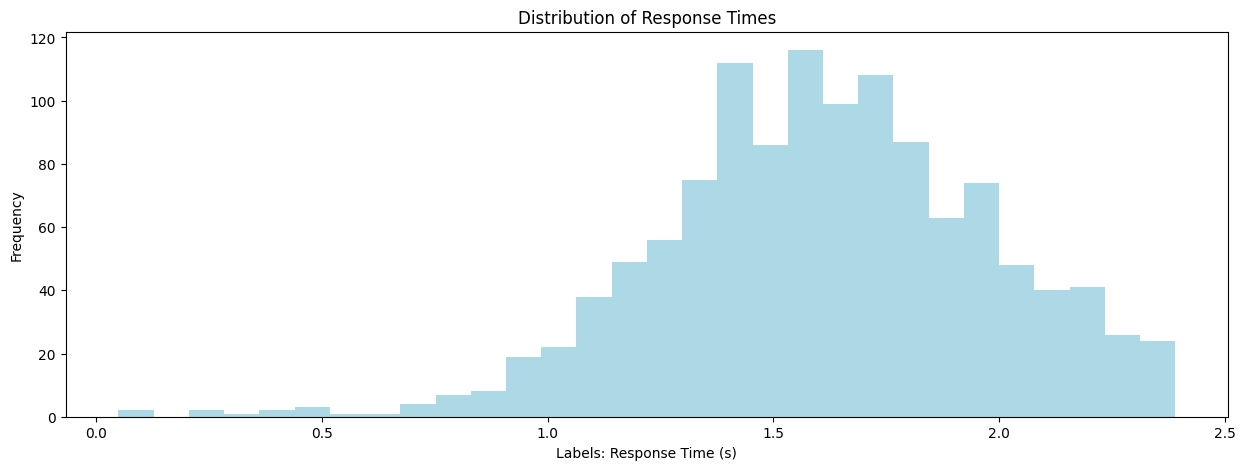

In [315]:
from matplotlib.pylab import plt

fig, ax = plt.subplots(figsize=(15, 5))
ax = metadata["target"].plot.hist(bins=30, ax=ax, color='lightblue')
ax.set_xlabel("Labels: Response Time (s)")
ax.set_ylabel("Frequency")
ax.set_title("Distribution of Response Times")
plt.show()

### An example of wrapping a custom function into `Preprocessor`
Suppose we want to predict feedback emotionality (positive/negative), then we'll want to re-annotate the dataset such that it includes the each feedback value in the annotations extras (`eegdash.hbn.windows.build_trial_table` discards them). So we define a custom function that takes a `Raw` object and modifies its annotations.

In [316]:
def reannotate_feedback(raw):
    annot = raw.annotations
    orig_time = annot[0]["orig_time"]
    annot_df = annot.to_data_frame(time_format=None)

    mapping_desc = {"contrastTrial_start": "contrast_trial_start", 
           "right_target": "stimulus_anchor", "left_target": "stimulus_anchor",
           "right_buttonPress": "response_anchor", "left_buttonPress": "response_anchor"}
    description = annot_df["description"].map(mapping_desc)
    annot_df["description"] = description
    annot_df = annot_df[annot_df["description"].isin(["contrast_trial_start", "stimulus_anchor", "response_anchor"])].reset_index(drop=True)

    mapping_feedback = {"n/a": np.nan, "non_target": 0, "sad_face": -1, "smiley_face": 1}
    def fill_feedback(df, idx):
        if df.at[idx, "description"] == "stimulus_anchor":
            if df.at[idx+1, "description"] == "response_anchor":
                return mapping_feedback[df.at[idx+1, "feedback"]]
        elif df.at[idx, "description"] == "response_anchor":
            return mapping_feedback[df.at[idx, "feedback"]]
        else:
            return np.nan
        
    targets = [fill_feedback(annot_df, idx) for idx in range(len(annot_df)-1)]
    annot_df.insert(len(annot_df.columns), "target", targets + [mapping_feedback[annot_df.at[len(annot_df)-1, "feedback"]]])
    annot_df = annot_df[annot_df["target"].notna()].reset_index(drop=True)
   
    new_items = {}
    for key in ["onset", "duration", "description"]:
        new_items[key] = list(annot_df[key])
    new_items["orig_time"] = annot.orig_time
    new_items["extras"] = [{"feedback": annot_df.at[_, "feedback"],
                            "target": annot_df.at[_, "target"]} for _ in range(len(annot_df))]
    new_annot = mne.Annotations(np.array(new_items["onset"], dtype=object),
                            np.array(new_items["duration"], dtype=object),
                            np.array(new_items["description"], dtype=object),
                            orig_time=orig_time, ch_names=None,
                            extras = new_items["extras"])
    raw.set_annotations(new_annot)  

In [317]:
%%capture
EPOCH_LEN_S = 2.0
SFREQ = 100 

preprocess(dataset_ccd_copy, [Preprocessor(reannotate_feedback, apply_on_array=False)] , n_jobs=1)

STIM_LOCK = "stimulus_anchor"
SHIFT_AFTER_STIM = 0.5
TRIAL_DURATION = 2.0

# Keep only recordings that actually contain stimulus anchors
custom_dataset = keep_only_recordings_with(STIM_LOCK, dataset_ccd_copy)

In [321]:
custom_raw = custom_dataset.datasets[0].raw
display(custom_raw.annotations.to_data_frame(time_format=None).head(6))

,onset,duration,description,feedback,target
0,110.062,0.0,stimulus_anchor,n/a,1.0
1,112.172,0.0,response_anchor,smiley_face,1.0
2,115.290,0.0,stimulus_anchor,n/a,1.0
3,117.160,0.0,response_anchor,smiley_face,1.0
4,122.090,0.0,stimulus_anchor,n/a,1.0
5,124.040,0.0,response_anchor,smiley_face,1.0


In [323]:
%%capture
custom_windows_dataset = create_windows_from_events(
    custom_dataset,
    mapping={STIM_LOCK: -100}, 
    trial_start_offset_samples=int(SHIFT_AFTER_STIM * SFREQ),                     # +0.5 s
    trial_stop_offset_samples=int((SHIFT_AFTER_STIM + TRIAL_DURATION) * SFREQ),   # +2.5 s
    window_size_samples=int(EPOCH_LEN_S * SFREQ),
    window_stride_samples=SFREQ,
    preload=True,
    use_mne_epochs=False
)

In [ ]:
custom_windows_dataset = add_extras_columns(
    custom_windows_dataset,
    custom_dataset,
    desc=STIM_LOCK,
    keys=("target", "feedback")
    )
custom_metadata = custom_windows_dataset.get_metadata()
display(custom_metadata)
# note, oddly, that our `custom_windows_dataset` has one more row than `windows_dataset`
# let's look into where/why...

,i_window_in_trial,i_start_in_trial,i_stop_in_trial,target,feedback,subject,run,task,age,sex,...,thepresent,diaryofawimpykid,contrastchangedetection_1,contrastchangedetection_2,contrastchangedetection_3,surroundsupp_1,surroundsupp_2,seqlearning6target,seqlearning8target,symbolsearch
0,0,11056,11256,1.0,n/a,NDARAH793FBF,1,contrastChangeDetection,9.3427,M,...,available,available,available,available,available,available,available,unavailable,available,available
1,0,11579,11779,1.0,n/a,NDARAH793FBF,1,contrastChangeDetection,9.3427,M,...,available,available,available,available,available,available,available,unavailable,available,available
2,0,12259,12459,1.0,n/a,NDARAH793FBF,1,contrastChangeDetection,9.3427,M,...,available,available,available,available,available,available,available,unavailable,available,available
3,0,13099,13299,1.0,n/a,NDARAH793FBF,1,contrastChangeDetection,9.3427,M,...,available,available,available,available,available,available,available,unavailable,available,available
4,0,13619,13819,1.0,n/a,NDARAH793FBF,1,contrastChangeDetection,9.3427,M,...,available,available,available,available,available,available,available,unavailable,available,available
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11,0,12089,12289,1.0,n/a,NDAREC480KFA,2,contrastChangeDetection,10.4762,M,...,available,available,available,available,available,available,available,unavailable,available,available
12,0,12769,12969,-1.0,n/a,NDAREC480KFA,2,contrastChangeDetection,10.4762,M,...,available,available,available,available,available,available,available,unavailable,available,available
13,0,13609,13809,1.0,n/a,NDAREC480KFA,2,contrastChangeDetection,10.4762,M,...,available,available,available,available,available,available,available,unavailable,available,available
14,0,14809,15009,1.0,n/a,NDAREC480KFA,2,contrastChangeDetection,10.4762,M,...,available,available,available,available,available,available,available,unavailable,available,available


In [ ]:
for i, val in enumerate(custom_metadata["i_start_in_trial"]):
    if val not in metadata["i_start_in_trial"].values:
        print(f"i_start_in_trial = {val} from `custom_metadata` at index {i} is missing in `metadata`")
# this is from the second recording of the first subejct
# since (i know) the first recording of the first subject has 21 windows in both datasets

i_start_in_trial = 20891 at index 23 is missing in custom_metadata


In [ ]:
raw1 = dataset.datasets[1].raw
raw2 = custom_dataset.datasets[1].raw

display(raw1.annotations.to_data_frame(time_format=None).head(10))
display(raw2.annotations.to_data_frame(time_format=None).head(10))
# see that `raw2`'s annotations is missing the stimulus-response pair with onset time (205.180, 208.414)

,onset,duration,description,anchor,correct,response_onset,response_type,rt_from_stimulus,rt_from_trialstart,stimulus_onset,target
0,195.066,2.0,contrast_trial_start,NaN,1,199.694,left_buttonPress,1.632,4.628,198.062,1.632
1,198.062,0.0,stimulus_anchor,stimulus,1,199.694,left_buttonPress,1.632,4.628,198.062,1.632
2,199.694,0.0,response_anchor,response,1,199.694,left_buttonPress,1.632,4.628,198.062,1.632
3,199.726,2.0,contrast_trial_start,NaN,1,205.180,left_buttonPress,1.390,5.454,203.790,1.390
4,203.790,0.0,stimulus_anchor,stimulus,1,205.180,left_buttonPress,1.390,5.454,203.790,1.390
5,205.180,0.0,response_anchor,response,1,205.180,left_buttonPress,1.390,5.454,203.790,1.390
6,210.046,2.0,contrast_trial_start,NaN,1,214.602,left_buttonPress,1.538,4.556,213.064,1.538
7,213.064,0.0,stimulus_anchor,stimulus,1,214.602,left_buttonPress,1.538,4.556,213.064,1.538
8,214.602,0.0,response_anchor,response,1,214.602,left_buttonPress,1.538,4.556,213.064,1.538
9,214.696,2.0,contrast_trial_start,NaN,1,220.098,right_buttonPress,1.336,5.402,218.762,1.336


,onset,duration,description,feedback,target
0,198.062,0.0,stimulus_anchor,n/a,1.0
1,199.694,0.0,response_anchor,smiley_face,1.0
2,203.790,0.0,stimulus_anchor,n/a,1.0
3,205.180,0.0,response_anchor,smiley_face,1.0
4,208.414,0.0,stimulus_anchor,n/a,1.0
5,210.046,0.0,response_anchor,smiley_face,1.0
6,213.064,0.0,stimulus_anchor,n/a,1.0
7,214.602,0.0,response_anchor,smiley_face,1.0
8,218.762,0.0,stimulus_anchor,n/a,1.0
9,220.098,0.0,response_anchor,smiley_face,1.0


In [ ]:
%%capture
# yes, unfortunately, we have to reload the dataset since dataset_ccd and dataset_ccd_copy have both been modified in-place
dataset_ccd_copy_copy = EEGChallengeDataset(task="contrastChangeDetection",
                                       release="R5", cache_dir=DATA_DIR,
                                       mini=True)

In [ ]:
display(dataset_ccd_copy_copy.datasets[1].raw.annotations.to_data_frame(time_format=None).head(15))
# hmmm... rows 8, 9 look normal to me... I honestly don't know why this pair got dropped...

,onset,duration,description,event_code,feedback
0,0.000,0.0,right_target,9,n/a
1,186.850,0.0,contrastChangeB2_start,95,n/a
2,195.066,0.0,contrastTrial_start,5,n/a
3,198.062,0.0,left_target,8,n/a
4,199.694,0.0,left_buttonPress,12,smiley_face
5,199.726,0.0,contrastTrial_start,5,n/a
6,203.790,0.0,left_target,8,n/a
7,205.180,0.0,left_buttonPress,12,smiley_face
8,205.430,0.0,contrastTrial_start,5,n/a
9,208.414,0.0,right_target,9,n/a


### Before we start the ML pipeline, let's take a look at the `winodws_dataset`
In PyTorch, there are two main dataset styles:
- Map-style dataset (classic kind)
    + Must implement `__len__`
    + Must implement `__getitem__`
    + Usually a subclass of `torch.utils.data.Dataset`, but not necessarily
- Iterable-style dataset
    + Must implement `__iter__`
    + Usually a subclass of `torch.utils.data.IterableDataset`, but not necessarily

`torch.utils.data.DataLoader` works with either, but behaves differently. Map-style datasets use `__len__` and `__getitem__` for shuffling and batching; iterable-style datasets use `__iter__` sequentially (not shuffled by default).


In [327]:
from torch.utils.data import Dataset, IterableDataset
from collections import namedtuple
from typing import Any

Check = namedtuple("Check", ["methods", "style"])
def check_dataset(ds: Any) -> Check:
    has_len = callable(getattr(ds, "__len__", None))
    has_getitem = callable(getattr(ds, "__getitem__", None)) 
    has_iter = callable(getattr(ds, "__iter__", None))
    methods = {
        "has_len": has_len,
        "has_getitem": has_getitem,
        "has_iter": has_iter
    }

    if isinstance(ds, IterableDataset): # note: `IterableDataset` is also a `Dataset` subclass
        return Check(methods, "Iterable-style (by IterableDataset subclass)")
    elif isinstance(ds, Dataset):
        return Check(methods, "Map-style (by Dataset subclass)")
    
    # fall-back checks
    if has_len and has_getitem:
        return Check(methods, "Map-style (by duck typing)")
    elif has_iter:
        return Check(methods, "Iterable-style (by duck typing)")
    else:
        return Check(methods, "Unknown style. DataLoader will probably crash.")

check1 = check_dataset(windows_dataset)
print("`windows_dataset`:")
print(f"  METHODS: {check1.methods}\n  STYLE: {check1.style}\n")

check2 = check_dataset(custom_windows_dataset)
print("`custom_windows_dataset`:")
print(f"  METHODS: {check2.methods}\n  STYLE: {check2.style}\n")

`windows_dataset`:
  METHODS: {'has_len': True, 'has_getitem': True, 'has_iter': False}
  STYLE: Map-style (by Dataset subclass)

`custom_windows_dataset`:
  METHODS: {'has_len': True, 'has_getitem': True, 'has_iter': False}
  STYLE: Map-style (by Dataset subclass)



In [328]:
idx = 100
x1, y1, *_ = windows_dataset[idx]
x2, y2, *_ = windows_dataset.__getitem__(idx)
print(f"Indexing via __getitem__: x1.shape = {x1.shape}, y1 = {y1}")
print(f"Indexing via [] operator: x2.shape = {x2.shape}, y2 = {y2}\n")

x3, y3, *_ = custom_windows_dataset[idx]
x4, y4, *_ = custom_windows_dataset.__getitem__(idx)
print(f"Indexing via __getitem__: x3.shape = {x3.shape}, y3 = {y3}")
print(f"Indexing via [] operator: x4.shape = {x4.shape}, y4 = {y4}")

Indexing via __getitem__: x1.shape = (129, 200), y1 = [1.492]
Indexing via [] operator: x2.shape = (129, 200), y2 = [1.492]

Indexing via __getitem__: x3.shape = (129, 200), y3 = [1.]
Indexing via [] operator: x4.shape = (129, 200), y4 = [1.]


### Train-test-valid splits

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.utils import check_random_state

valid_frac = 0.1
test_frac = 0.1
seed = 2025

subjects = meta_info["subject"].unique()
# don't know why they're removed here (?)
sub_rm = ["NDARWV769JM7", "NDARME789TD2", "NDARUA442ZVF", "NDARJP304NK1",
          "NDARTY128YLU", "NDARDW550GU6", "NDARLD243KRE", "NDARUJ292JXV", "NDARBA381JGH"]
subjects = [s for s in subjects if s not in sub_rm]

# dividing at the subject-level for better generalization across subjects (?)
train_subj, valid_test_subject = train_test_split(
    subjects, test_size=(valid_frac + test_frac), random_state=check_random_state(seed), shuffle=True
)

valid_subj, test_subj = train_test_split(
    valid_test_subject, test_size=test_frac, random_state=check_random_state(seed + 1), shuffle=True
)
# sanity check via set union
assert (set(valid_subj) | set(test_subj) | set(train_subj)) == set(subjects)

In [21]:
# split the dataset based on information listed in its description
# `subject_split` is a dict with the name of the split (a string) as key and the dataset as value
subject_split = single_windows.split(by = "subject")

train_set = []
valid_set = []
test_set = []

for s in subject_split:
    if s in train_subj:
        train_set.append(subject_split[s])
    elif s in valid_subj:
        valid_set.append(subject_split[s])
    elif s in test_subj:
        test_set.append(subject_split[s])

train_set = BaseConcatDataset(train_set)
valid_set = BaseConcatDataset(valid_set)
test_set = BaseConcatDataset(test_set)

print("Number of examples in each split in the mini-release")
print(f"Train:\t{len(train_set)}")
print(f"Valid:\t{len(valid_set)}")
print(f"Test:\t{len(test_set)}")

Number of examples in each split in the mini-release
Train:	981
Valid:	183
Test:	50


In [23]:
# pytorch datasets and dataloaders
from torch.utils.data import DataLoader

batch_size = 128
num_workers = 1 # can increase for faster data loading

train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=num_workers)
valid_loader = DataLoader(valid_set, batch_size=batch_size, shuffle=False, num_workers=num_workers)
test_loader = DataLoader(test_set, batch_size=batch_size, shuffle=False, num_workers=num_workers)

In [24]:
from braindecode.models.util import models_dict

names = sorted(models_dict)
w = max(len(n) for n in names)

for i in range(0, len(names), 3):
    row = names[i:i+3]
    print("  ".join(f"{n:<{w}}" for n in row))

ATCNet                  AttentionBaseNet        AttnSleep             
BDTCN                   BIOT                    CTNet                 
ContraWR                Deep4Net                DeepSleepNet          
EEGConformer            EEGITNet                EEGInceptionERP       
EEGInceptionMI          EEGMiner                EEGNeX                
EEGNet                  EEGSimpleConv           EEGTCNet              
FBCNet                  FBLightConvNet          FBMSNet               
IFNet                   Labram                  MSVTNet               
SCCNet                  SPARCNet                ShallowFBCSPNet       
SignalJEPA              SignalJEPA_Contextual   SignalJEPA_PostLocal  
SignalJEPA_PreLocal     SincShallowNet          SleepStagerBlanco2020 
SleepStagerChambon2018  SyncNet                 TIDNet                
TSception               USleep                


In [ ]:
# input shape: (batch_size, n_channels, n_times)
from braindecode.models import EEGNeX

model = EEGNeX(n_chans=129,  # 129 channels
               n_outputs=1,  # 1 output for regression
               n_times=200,  # 2 secs * sfreq
               sfreq=100,    # sample frequency 100 Hz
        )
print(model)

Layer (type (var_name):depth-idx)                            Input Shape               Output Shape              Param #                   Kernel Shape
EEGNeX (EEGNeX)                                              [1, 129, 200]             [1, 1]                    --                        --
├─Sequential (block_1): 1-1                                  [1, 129, 200]             [1, 8, 129, 200]          --                        --
│    └─Rearrange (0): 2-1                                    [1, 129, 200]             [1, 1, 129, 200]          --                        --
│    └─Conv2d (1): 2-2                                       [1, 1, 129, 200]          [1, 8, 129, 200]          512                       [1, 64]
│    └─BatchNorm2d (2): 2-3                                  [1, 8, 129, 200]          [1, 8, 129, 200]          16                        --
├─Sequential (block_2): 1-2                                  [1, 8, 129, 200]          [1, 32, 129, 200]         --                  

### The rest is our classic PyTorch/torch lighting/skorch training pipeline

In [49]:
# Defining training parameters

lr = 1E-3
weight_decay = 1E-5
n_epochs = 100
early_stopping_patience = 50

In [50]:
from typing import Optional
import torch
from torch.utils.data import DataLoader
from tqdm import tqdm
from torch.nn import Module
from torch.optim.lr_scheduler import LRScheduler

# Define a method for training one epoch
def train_one_epoch(
    dataloader: DataLoader,
    model: Module,
    loss_fn,
    optimizer,
    scheduler: Optional[LRScheduler],
    device,
    print_batch_stats: bool = True,
):
    model.train()

    total_loss = 0.0
    ### sum_sq_err = 0.0 ###
    mse_sum = 00
    ### n_samples = 0 ###
    number_of_samples = 0

    progress_bar = tqdm(
        enumerate(dataloader),
        total=len(dataloader),
        disable=not print_batch_stats
    )

    for batch_idx, batch in progress_bar:
        # Support datasets that may return (X, y) or (X, y, ...)
        X, y = batch[0], batch[1]
        X, y = X.to(device).float(), y.to(device).float()

        optimizer.zero_grad(set_to_none=True)
        preds = model(X)
        loss = loss_fn(preds, y)
        loss.backward()
        optimizer.step()
        
        loss_per_batch = loss.item()
        total_loss += loss_per_batch
        
        # better way to calculate MSE than manual sum_sq_err
        mse_sum += loss_per_batch * y.size(0)
        number_of_samples += y.size(0)

        # Flatten to 1D for regression metrics and accumulate squared error since output shape is (1, 1)
        ### preds_flat = preds.detach().view(-1) ###
        ### y_flat = y.detach().view(-1) ###
        ### sum_sq_err += torch.sum((preds_flat - y_flat) ** 2).item() ###
        ### n_samples += y_flat.numel() ###

        if print_batch_stats:
            ### running_rmse = (sum_sq_err / max(n_samples, 1)) ** 0.5 ###
            my_running_rmse = (mse_sum / max(number_of_samples, 1)) ** 0.5
            progress_bar.set_description(
                f"  Train Batch {batch_idx + 1}/{len(dataloader)}, "
                f"Loss: {loss.item():.6f}, RMSE: {my_running_rmse:.6f}"
            )

    if scheduler is not None:
        scheduler.step()

    avg_loss = total_loss / len(dataloader)
    ### rmse = (sum_sq_err / max(n_samples, 1)) ** 0.5 ###
    my_rmse = (mse_sum / max(number_of_samples, 1)) ** 0.5
    return avg_loss, my_rmse

@torch.no_grad()
def valid_model(
    dataloader: DataLoader,
    model: Module,
    loss_fn,
    device,
    print_batch_stats: bool = True,
):
    model.eval()

    total_loss = 0.0
    ### sum_sq_err = 0.0 ###
    mse_sum = 0.0
    n_batches = len(dataloader)
    ### n_samples = 0 ###
    number_of_samples = 0

    progress_bar = tqdm(
        enumerate(dataloader),
        total=n_batches,
        disable=not print_batch_stats
    )

    for batch_idx, batch in progress_bar:
        # Supports (X, y) or (X, y, ...)
        X, y = batch[0], batch[1]
        X, y = X.to(device).float(), y.to(device).float()
        # casting X to float32

        preds = model(X)
        loss_per_batch = loss_fn(preds, y).item()
        total_loss += loss_per_batch
        
        # better way to calculate MSE than manual sum_sq_err
        mse_sum += loss_per_batch * y.size(0)
        number_of_samples += y.size(0)

        ### preds_flat = preds.detach().view(-1)
        ### y_flat = y.detach().view(-1)
        ### sum_sq_err += torch.sum((preds_flat - y_flat) ** 2).item()
        ### n_samples += y_flat.numel()

        if print_batch_stats:
            ### running_rmse = (sum_sq_err / max(n_samples, 1)) ** 0.5 ###
            my_running_rmse = (mse_sum / max(number_of_samples, 1)) ** 0.5
            progress_bar.set_description(
                f"  Valid Batch {batch_idx + 1}/{n_batches}, "
                f"Loss: {loss_per_batch:.6f}, RMSE: {my_running_rmse:.6f}"
            )

    avg_loss = total_loss / n_batches if n_batches else float("nan")
    ### rmse = (sum_sq_err / max(n_samples, 1)) ** 0.5 ###
    my_rmse = (mse_sum / max(number_of_samples, 1)) ** 0.5

    return avg_loss, my_rmse


In [51]:
optimizer = torch.optim.AdamW(model.parameters(), lr=lr, weight_decay=weight_decay)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=n_epochs - 1)
loss_fn = torch.nn.MSELoss()

patience = 5
min_delta = 1e-4
best_rmse = float("inf")
epochs_no_improve = 0
best_state, best_epoch = None, None

# track losses and RMSEs over epochs to plot later
train_loss_per_epoch, train_rmse_per_epoch, valid_loss_per_epoch, valid_rmse_per_epoch = [], [], [], []
for epoch in range(1, n_epochs + 1):
    print(f"Epoch {epoch}/{n_epochs}: ", end="")

    train_loss, train_rmse = train_one_epoch(train_loader, model, loss_fn, optimizer, scheduler, device)
    train_loss_per_epoch.append(train_loss)
    train_rmse_per_epoch.append(train_rmse)

    valid_loss, valid_rmse = valid_model(valid_loader, model, loss_fn, device) # oroginal starter kit passed `test_loader`
    valid_loss_per_epoch.append(valid_loss)
    valid_rmse_per_epoch.append(valid_rmse)

    print(
        f"  Train RMSE: {train_rmse:.6f}, "
        f"Average Train Loss: {train_loss:.6f}, "
        f"Valid RMSE: {valid_rmse:.6f}, "
        f"Average Valid Loss: {valid_loss:.6f}\n"
    )

    if valid_rmse < best_rmse - min_delta:
        best_rmse = valid_rmse
        best_state = copy.deepcopy(model.state_dict())
        best_epoch = epoch
        epochs_no_improve = 0
    else:
        epochs_no_improve += 1
        if epochs_no_improve >= patience:
            print(f"Early stopping at epoch {epoch}. Best Valid RMSE: {best_rmse:.6f} (epoch {best_epoch})")
            break

if best_state is not None:
    model.load_state_dict(best_state)

train_set_y, valid_set_y = np.array([item[1][0] for item in train_set]), np.array([item[1][0] for item in valid_set])
train_r_suqared = 1 - train_rmse**2 / np.var(train_set_y)
valid_r_suqared = 1 - valid_rmse**2 / np.var(valid_set_y)

Epoch 1/100: 

  Train Batch 8/8, Loss: 2.724095, RMSE: 1.719465: 100%|█| 8/8 [00:21<00:00,  2.
  Valid Batch 2/2, Loss: 3.558193, RMSE: 1.761675: 100%|█| 2/2 [00:06<00:00,  3.

  Train RMSE: 1.719465, Average Train Loss: 2.946799, Valid RMSE: 1.761675, Average Valid Loss: 3.233157

Epoch 2/100: 


  Train Batch 8/8, Loss: 2.143432, RMSE: 1.588850: 100%|█| 8/8 [00:20<00:00,  2.
  Valid Batch 2/2, Loss: 3.243466, RMSE: 1.677020: 100%|█| 2/2 [00:06<00:00,  3.

  Train RMSE: 1.588850, Average Train Loss: 2.508445, Valid RMSE: 1.677020, Average Valid Loss: 2.935319

Epoch 3/100: 


  Train Batch 8/8, Loss: 0.900434, RMSE: 1.248267: 100%|█| 8/8 [00:20<00:00,  2.
  Valid Batch 2/2, Loss: 2.128034, RMSE: 1.338508: 100%|█| 2/2 [00:06<00:00,  3.

  Train RMSE: 1.248267, Average Train Loss: 1.530551, Valid RMSE: 1.338508, Average Valid Loss: 1.887539

Epoch 4/100: 


  Train Batch 8/8, Loss: 0.540293, RMSE: 0.794110: 100%|█| 8/8 [00:20<00:00,  2.
  Valid Batch 2/2, Loss: 0.632884, RMSE: 0.698422: 100%|█| 2/2 [00:06<00:00,  3.

  Train RMSE: 0.794110, Average Train Loss: 0.626818, Valid RMSE: 0.698422, Average Valid Loss: 0.529166

Epoch 5/100: 


  Train Batch 8/8, Loss: 0.324060, RMSE: 0.652770: 100%|█| 8/8 [00:20<00:00,  2.
  Valid Batch 2/2, Loss: 0.112273, RMSE: 0.344039: 100%|█| 2/2 [00:06<00:00,  3.

  Train RMSE: 0.652770, Average Train Loss: 0.421823, Valid RMSE: 0.344039, Average Valid Loss: 0.116626

Epoch 6/100: 


  Train Batch 8/8, Loss: 0.357757, RMSE: 0.580124: 100%|█| 8/8 [00:20<00:00,  2.
  Valid Batch 2/2, Loss: 0.088111, RMSE: 0.341238: 100%|█| 2/2 [00:06<00:00,  3.

  Train RMSE: 0.580124, Average Train Loss: 0.337435, Valid RMSE: 0.341238, Average Valid Loss: 0.108364

Epoch 7/100: 


  Train Batch 8/8, Loss: 0.376522, RMSE: 0.547232: 100%|█| 8/8 [00:21<00:00,  2.
  Valid Batch 2/2, Loss: 0.137015, RMSE: 0.374954: 100%|█| 2/2 [00:06<00:00,  3.

  Train RMSE: 0.547232, Average Train Loss: 0.302699, Valid RMSE: 0.374954, Average Valid Loss: 0.139571

Epoch 8/100: 


  Train Batch 8/8, Loss: 0.318259, RMSE: 0.538958: 100%|█| 8/8 [00:21<00:00,  2.
  Valid Batch 2/2, Loss: 0.182731, RMSE: 0.395806: 100%|█| 2/2 [00:06<00:00,  3.

  Train RMSE: 0.538958, Average Train Loss: 0.291642, Valid RMSE: 0.395806, Average Valid Loss: 0.164096

Epoch 9/100: 


  Train Batch 8/8, Loss: 0.268333, RMSE: 0.526318: 100%|█| 8/8 [00:21<00:00,  2.
  Valid Batch 2/2, Loss: 0.423850, RMSE: 0.576985: 100%|█| 2/2 [00:06<00:00,  3.

  Train RMSE: 0.526318, Average Train Loss: 0.276646, Valid RMSE: 0.576985, Average Valid Loss: 0.358843

Epoch 10/100: 


  Train Batch 8/8, Loss: 0.263070, RMSE: 0.508804: 100%|█| 8/8 [00:20<00:00,  2.
  Valid Batch 2/2, Loss: 0.330863, RMSE: 0.524686: 100%|█| 2/2 [00:06<00:00,  3.

  Train RMSE: 0.508804, Average Train Loss: 0.259057, Valid RMSE: 0.524686, Average Valid Loss: 0.291141

Epoch 11/100: 


  Train Batch 8/8, Loss: 0.304777, RMSE: 0.506661: 100%|█| 8/8 [00:21<00:00,  2.
  Valid Batch 2/2, Loss: 0.279571, RMSE: 0.492546: 100%|█| 2/2 [00:06<00:00,  3.


  Train RMSE: 0.506661, Average Train Loss: 0.258724, Valid RMSE: 0.492546, Average Valid Loss: 0.253144

Early stopping at epoch 11. Best Valid RMSE: 0.341238 (epoch 6)


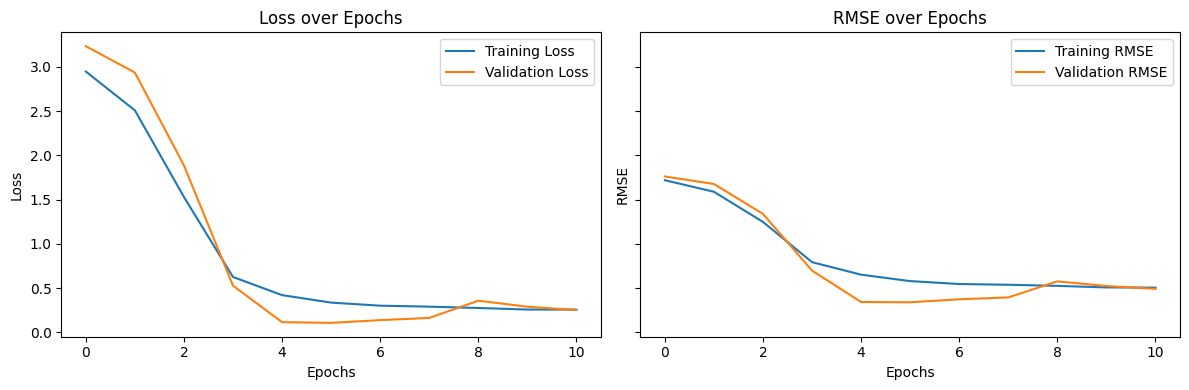

R squared on train set: -0.974828
R squared on valid set: -1.181535


In [52]:
def plot_loss_rmse(train_loss_per_epoch, train_rmse_per_epoch, valid_loss_per_epoch, valid_rmse_per_epoch):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4), sharey=True)
    
    ax1.plot(train_loss_per_epoch, label="Training Loss")
    ax1.plot(valid_loss_per_epoch, label="Validation Loss")
    ax1.set_title("Loss over Epochs")
    ax1.set_xlabel("Epochs")
    ax1.set_ylabel("Loss")
    ax1.legend()

    ax2.plot(train_rmse_per_epoch, label="Training RMSE")
    ax2.plot(valid_rmse_per_epoch, label="Validation RMSE")
    ax2.set_title("RMSE over Epochs")
    ax2.set_xlabel("Epochs")
    ax2.set_ylabel("RMSE")
    ax2.legend()
    
    plt.tight_layout()
    plt.show()    
    
plot_loss_rmse(train_loss_per_epoch, train_rmse_per_epoch, valid_loss_per_epoch, valid_rmse_per_epoch)
print(f"R squared on train set: {train_r_suqared:.6f}")
print(f"R squared on valid set: {valid_r_suqared:.6f}")

In [ ]:
# saving the model

### torch.save(model.state_dict(), "model.pth") ###


In [53]:
test_loss, test_rmse = valid_model(test_loader, model, loss_fn, device)
test_set_y = np.array([item[1][0] for item in test_set])
r_suqared = 1 - test_rmse**2 / np.var(test_set_y)
print(f"R squared on test set: {r_suqared:.6f}")

  Valid Batch 1/1, Loss: 0.218384, RMSE: 0.467316: 100%|█| 1/1 [00:08<00:00,  8.

R squared on test set: -0.026186


# Common questions:

1) Do I need to use only braindecode?

No! You can use any model that gets a tensor as input, outputs a tensor, and implements the forward method.

2) Can I apply extra preprocessing/dataset loader for the hidden data?
    
No, any transformation needs to be inside your model. but we are super open to contributions to the libraries (eggdash and braindecode) to accommodate any reasonable request.
